In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import turingquant as tq

In [42]:
#Empresas Selecionadas para análise: Petrobras, BTG Pactual, Itaú Unibanco, Credit Suisse, Vivo e TIM
tickers = ['PETR4.SA', 'ITUB4.SA', 'HGLG11.SA', 'VIVT3.SA', 'TIMS3.SA']

In [43]:
df_close = yf.download(tickers, start='2019-01-01', end='2022-12-31')['Close']

[*********************100%***********************]  5 of 5 completed


In [44]:
df_close

,HGLG11.SA,ITUB4.SA,PETR4.SA,TIMS3.SA,VIVT3.SA
Date,,,,,
2019-01-02,140.899994,37.000000,24.059999,12.15,41.910000
2019-01-03,140.949997,37.610001,24.650000,11.92,41.400002
2019-01-04,140.250000,36.980000,24.719999,11.98,41.090000
2019-01-07,141.500000,37.049999,25.110001,12.37,41.200001
2019-01-08,142.000000,37.520000,24.959999,12.84,40.299999
...,...,...,...,...,...
2022-12-23,163.000000,25.190001,25.120001,12.30,38.459999
2022-12-26,163.990005,24.690001,24.940001,12.12,37.560001
2022-12-27,164.240005,24.549999,25.110001,12.23,37.410000


In [45]:
returns_pre = tq.metrics.returns(df_close)

In [46]:
returns = returns_pre[2:]

**Matrix Seriation:** visa verificar o quão próximas as ações são umas das outras. Nesse sentido, foram escolhidas empresas do mesmo setor para verificar se o algoritmo é capaz de identificar potenciais semelhanças setoriais:
- Vivo e TIM: setor de telefonia
- Credit Suisse e Itaú: setor bancário

Para tanto, serão combinados um dendograma e uma matriz de covariância, como segue abaixo:

In [47]:
def matrix_seriation(returns):
    matriz_covarianca = returns.cov()
    dendograma = sns.clustermap(matriz_covarianca, method='ward', metric='euclidean')
    colunas_seriation = dendograma.dendrogram_col.reordered_ind
    colunas_seriation = returns.columns[colunas_seriation]
    return matriz_covarianca

,HGLG11.SA,ITUB4.SA,PETR4.SA,TIMS3.SA,VIVT3.SA
HGLG11.SA,0.000183,0.000058,0.000118,0.000063,0.000028
ITUB4.SA,0.000058,0.000486,0.000360,0.000191,0.000136
PETR4.SA,0.000118,0.000360,0.000951,0.000228,0.000162
TIMS3.SA,0.000063,0.000191,0.000228,0.000419,0.000230
VIVT3.SA,0.000028,0.000136,0.000162,0.000230,0.000324


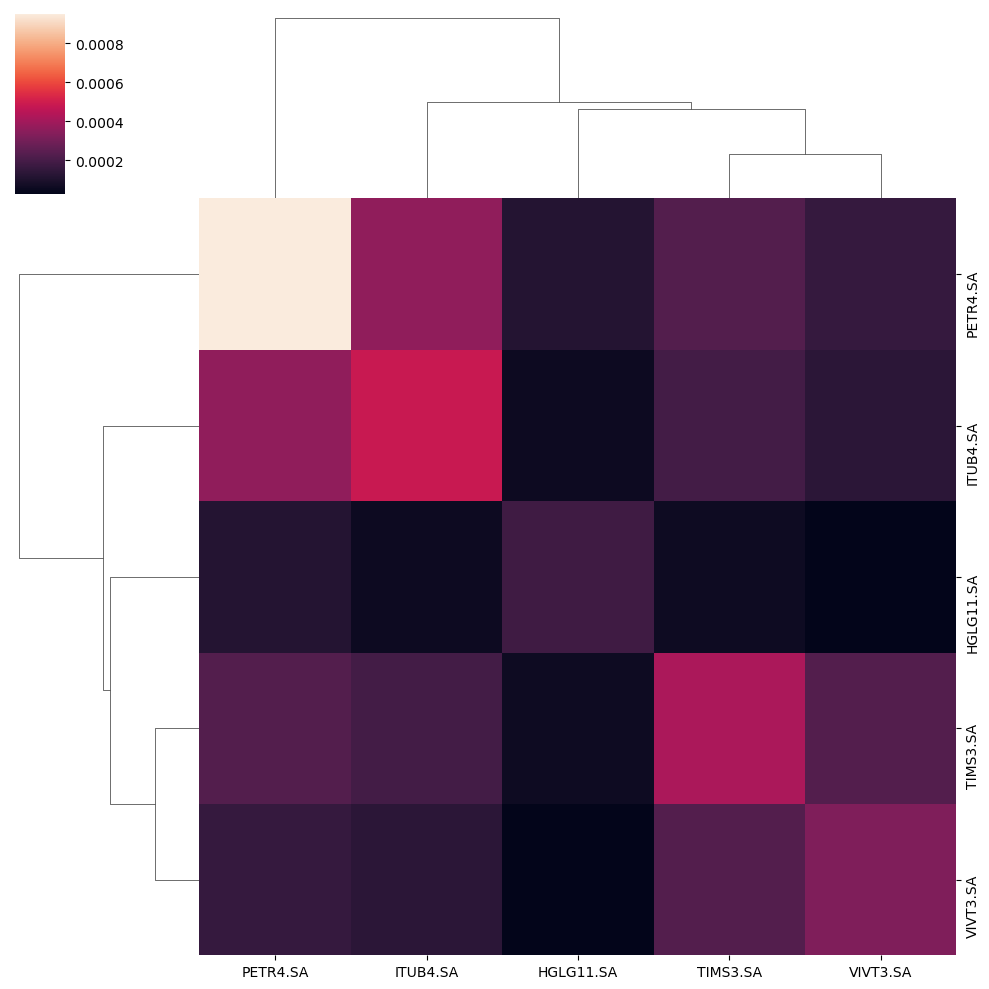

In [48]:
matrix_seriation(returns)

**Resultados:** fica evidenciada a capacidade de determinar a proximidade entre as ações, tanto pelo dendograma quanto pela matriz de covariância